In [1]:
from dynamics import base, creator, model, solution
from dynamics.tools import Body, kinectic, potentialGrav, rotation
from dynamics.tools.solver import euler

In [2]:
simulation = base.Simulation()
# simulation.register("mass", Body, 1, 0, 1, name="test")
body = creator.create('body', Body, **{'mass':1, 'drag_coeff':0, 'length':1})
simulation.register('mass', body)
simulation.register('solver', euler)

In [3]:
motion = rotation(simulation.mass.length, "x")
sol = solution.Solution()
simulation.register('model', model.Model(motion, simulation.mass, sol))
simulation.model.acceleration()

xddot(t)/(x(t)**2 - 1) - x(t)*xdot(t)**2/(x(t)**2 - 1)**2 - 9.80665*(x(t)**2 - 1)**2*x(t)/(1 - x(t)**2)**(5/2)

In [4]:
simulation.run()

100%|██████████| 500/500 [00:01<00:00, 288.46it/s]


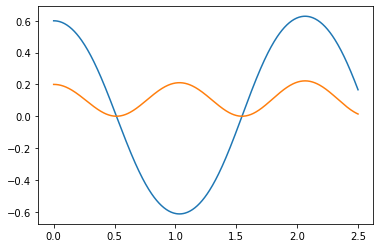

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
solu = simulation.solution
plt.plot(solu.t_rec, solu.s_rec)
plt.plot(solu.t_rec, simulation.mass.length-(simulation.mass.length**2 - np.array(solu.s_rec)**2)**0.5)
plt.show()

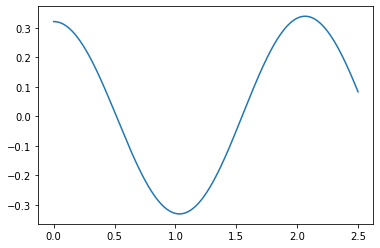

In [6]:
import math
x = solu.s_rec
y = simulation.mass.length-(simulation.mass.length**2 - np.array(solu.s_rec)**2)**0.5
theta = []
for i in range(len(y)):
    theta.append(math.atan(y[i]/x[i]))
plt.plot(solu.t_rec, theta)
plt.show()

In [6]:
expre = simulation.model.acceleration()

In [7]:
import sympy as sp
from sympy.physics.vector import dynamicsymbols
mass_equ = expre.coeff(dynamicsymbols('xddot'))
print(mass_equ)
react_equ = sp.simplify(-expre.subs(dynamicsymbols('xddot'), 0))
print(react_equ)
acc = sp.simplify(react_equ / mass_equ)
print(acc)

1/(x(t)**2 - 1)
((1 - x(t)**2)**(5/2)*xdot(t)**2 + 9.80665*(x(t)**2 - 1)**4)*x(t)/(1 - x(t)**2)**(9/2)
-((1 - x(t)**2)**(5/2)*xdot(t)**2 + 9.80665*(x(t)**2 - 1)**4)*x(t)/(1 - x(t)**2)**(7/2)


In [8]:
s = 0.6
v = 0
t = 0
dt = 5e-3

s_rec = [s]
v_rec = [v]
t_rec = [t]

In [9]:
from dynamics.tools.solver import euler, improved_euler, RK2, RK4
for i in range(500):
    
    s, v, t = euler(acc, s, v, t, dynamicsymbols('x'),
                    dynamicsymbols('xdot'), dt)

    s_rec.append(s)
    v_rec.append(v)
    t_rec.append(t)

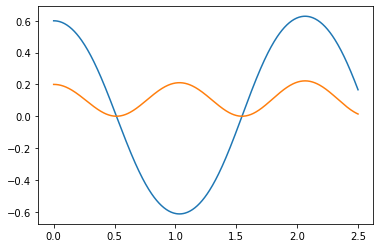

In [10]:
import matplotlib.pyplot as plt 
import numpy as np
plt.plot(t_rec, s_rec)
plt.plot(t_rec, simulation.mass.length-(simulation.mass.length**2 - np.array(s_rec)**2)**0.5)
plt.show()

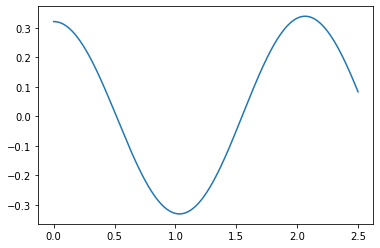

In [11]:
import math
x = s_rec
y = simulation.mass.length-(simulation.mass.length**2 - np.array(s_rec)**2)**0.5
theta = []
for i in range(len(y)):
    theta.append(math.atan(y[i]/x[i]))
# plt.plot(t_rec, s_rec)
plt.plot(t_rec, theta)
plt.show()
